In [1]:
import csv
import pandas as pd
import random

fileloc = "/Users/cveinnt/Documents/LDA_Experiment/all_skills_sorted.tsv"

In [4]:
#Sampling method 1: selecting every n entry
#n = 500000 
#df = pd.read_csv(fileloc, sep="\t", skiprows=lambda i: i % n != 0)

In [5]:
#Sampling method 2: using probability p
p = 0.001  # 1% of the lines, if random from [0,1] interval is greater than 0.01 the row will be skipped
df = pd.read_csv(
         fileloc,
         sep="\t",
         skiprows=lambda i: i>0 and random.random() > p
)
#This will yield approximately 316938 rows

In [6]:
df.columns = ['skillsets', 'skills'] 
df = df.sample(frac=1)
df.shape
a = df.values
#taking only the skills column
b = a[:, 1]

In [7]:
#Preprocessing step 1: vectorize the data
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','), min_df=10) #max_df=0.95, min_df=2
tf = tf_vectorizer.fit_transform(b)
tf_feature_names = tf_vectorizer.get_feature_names()

In [14]:
#Preprocessing step 2: normalization
from sklearn.preprocessing import normalize

tf_feature_names
#tf_normalized = normalize(tf)
#pdata = tf_normalized.toarray()
pdata = tf.toarray()
tf

<31637x4985 sparse matrix of type '<class 'numpy.int64'>'
	with 529407 stored elements in Compressed Sparse Row format>

In [15]:
#LDA Implementation
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 44

# Run LDA
lda1 = LatentDirichletAllocation(n_components=no_topics, max_iter=500, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


In [18]:
#Display lda results
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
#Displaying Top 10 Words
no_top_words = 10
display_topics(lda1, tf_feature_names, no_top_words)

Topic 0:
medical devices, pharmaceutical industry, medicine, biotechnology, molecular biology, science, life sciences, biochemistry, lifesciences, clinical research
Topic 1:
military, security clearance, office administration, dod, office management, administrative assistants, military experience, military operations, operational planning, organizational leadership
Topic 2:
legal research, trials, criminal law, appeals, personal injury, family law, trial practice, legal issues, product liability, hearings
Topic 3:
business analysis, requirements analysis, business intelligence, integration, project management, sdlc, business process, software project management, erp, it strategy
Topic 4:
aviation, equities, aircraft, derivatives, fixed income, financial markets, airlines, trading, bloomberg, flights
Topic 5:
mental health, psychology, psychotherapy, crisis intervention, adolescents, mental health counseling, counseling psychology, family therapy, stress management, cbt
Topic 6:
securit

In [19]:
#Calculate perplexity
print(lda1.perplexity(tf))

418.69108180944113


In [48]:
ldaOut = lda1.transform(tf)

In [49]:
print(lda1)
print(ldaOut.shape)
print(lda1.components_.shape)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=500, mean_change_tol=0.001,
             n_components=44, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)
(31637, 44)
(44, 4985)


<BarContainer object of 44 artists>

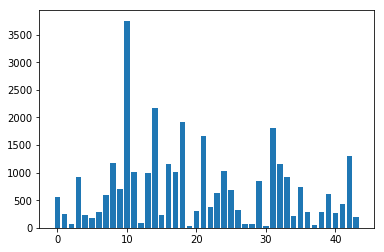

In [50]:
from matplotlib import pyplot as plt
plt.bar(df_skill_distribution['Skill Num'], df_skill_distribution['Num People'])

In [51]:
# Show top k keywords for each skill
def show_topics(vectorizer, lda_model, k_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        # sort in descending order
        top_keyword_idx = (-topic_weights).argsort()[:k_words]
        topic_keywords.append(keywords.take(top_keyword_idx))
    return topic_keywords

In [52]:
# Topic - Keywords Dataframe
topic_keywords = show_topics(vectorizer=tf_vectorizer, lda_model=lda1, k_words=15)
df_skill_keywords = pd.DataFrame(topic_keywords)
df_skill_keywords.columns = ['Word '+ str(i) for i in range(df_skill_keywords.shape[1])]
df_skill_keywords.index = ['Skill '+ str(i) for i in range(df_skill_keywords.shape[0])]
df_skill_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Skill 0,medical devices,pharmaceutical industry,biotechnology,molecular biology,science,life sciences,biochemistry,lifesciences,product launch,research,clinical research,cell culture,pharmaceutical sales,pcr,healthcare
Skill 1,military,security clearance,office administration,dod,office management,administrative assistants,military experience,military operations,operational planning,organizational leadership,government,program management,command,defense,national security
Skill 2,legal research,trials,criminal law,appeals,personal injury,family law,trial practice,legal issues,product liability,hearings,torts,personal injury litigation,deep tissue massage,notary public,construction law
Skill 3,business analysis,requirements analysis,integration,business intelligence,project management,sdlc,business process,software project management,erp,it strategy,management,program management,business process improvement,consulting,itil
Skill 4,aviation,equities,aircraft,derivatives,fixed income,financial markets,airlines,bloomberg,flights,trading,commercial aviation,hedge funds,aerospace,capital markets,aircraft maintenance
Skill 5,mental health,psychology,psychotherapy,crisis intervention,adolescents,mental health counseling,counseling psychology,family therapy,stress management,cbt,see 9+,personal development,psychological assessment,motivational interviewing,stress
Skill 6,security,risk assessment,emergency management,physical security,first aid,investigation,security management,test planning,surveillance,weapons,security operations,manual testing,crisis management,private investigations,regression testing
Skill 7,financial analysis,finance,risk management,banking,financial modeling,corporate finance,investments,portfolio management,due diligence,financial services,mergers & acquisitions,financial risk,analysis,valuation,business strategy
Skill 8,accounting,financial reporting,auditing,financial accounting,financial analysis,accounts payable,internal controls,legal writing,accounts receivable,litigation,account reconciliation,budgets,finance,tax,forecasting
Skill 9,coaching,performance management,organizational development,training,leadership development,change management,human resources,employee relations,recruiting,personnel management,employee engagement,employee training,management,talent management,leadership


In [53]:
#Store results to a local .csv file
df_skill_keywords.to_csv('results.csv')